In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [4]:
#loading dataset
(X_train,y_train) , (X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

Data Visualization

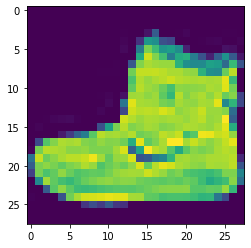

In [5]:
#Let's see the first image
plt.imshow(X_train[0])

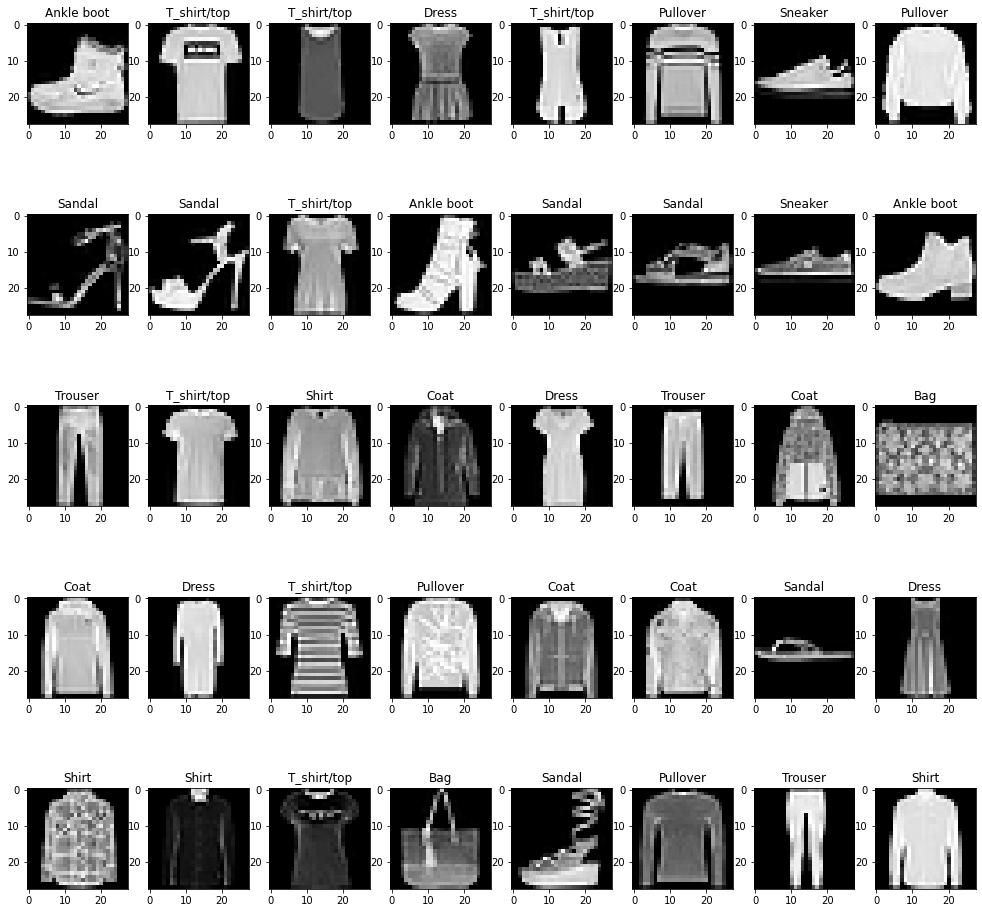

In [6]:
# let's visualize the first 40 images
feature_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(17, 17))
for i in range(40):     
    plt.subplot(5, 8, i + 1)
    plt.grid(False)
    plt.imshow(X_train[i],cmap='gray')
    index = y_train[i]
    plt.title(feature_names[index])
plt.show()

Setup & Preparation of the data

In [7]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

In [8]:
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

In [9]:
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

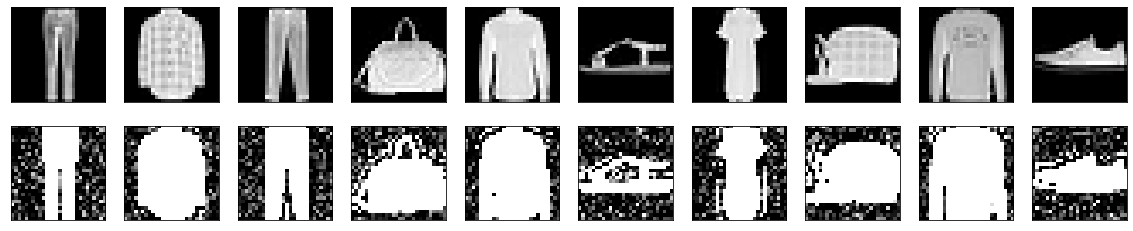

In [10]:
# Normalize and reshape the data
train_data = preprocess(X_train)
test_data = preprocess(X_test)

# Create a copy of the data with added noise
noisy_train_data = noise(X_train)
noisy_test_data = noise(X_test)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

Build the autoencoder

In [11]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)       

Training the autoencoder

In [12]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/10
469/469 [==============================] - 65s 139ms/step - loss: 0.3031 - val_loss: 0.2720
Epoch 2/10
469/469 [==============================] - 66s 140ms/step - loss: 0.2665 - val_loss: 0.2654
Epoch 3/10
469/469 [==============================] - 65s 138ms/step - loss: 0.2604 - val_loss: 0.2602
Epoch 4/10
469/469 [==============================] - 64s 136ms/step - loss: 0.2571 - val_loss: 0.2583
Epoch 5/10
469/469 [==============================] - 64s 136ms/step - loss: 0.2554 - val_loss: 0.2568
Epoch 6/10
469/469 [==============================] - 65s 138ms/step - loss: 0.2544 - val_loss: 0.2559
Epoch 7/10
469/469 [==============================] - 65s 138ms/step - loss: 0.2535 - val_loss: 0.2554
Epoch 8/10
469/469 [==============================] - 65s 138ms/step - loss: 0.2529 - val_loss: 0.2546
Epoch 9/10
469/469 [==============================] - 64s 136ms/step - loss: 0.2523 - val_loss: 0.2541
Epoch 10/10
469/469 [==============================] - 65s 138ms/step - l

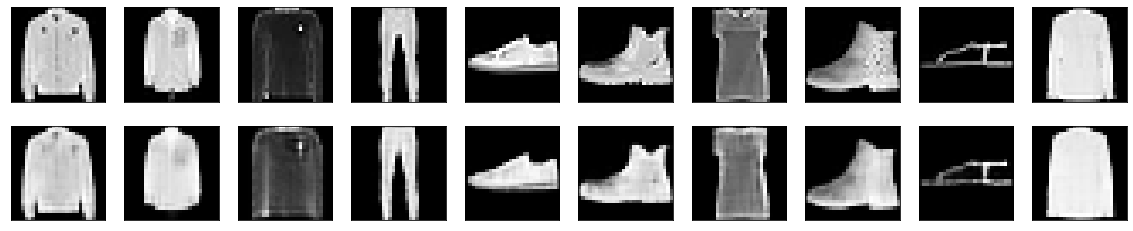

In [13]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [14]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 65s 139ms/step - loss: 0.3197 - val_loss: 0.3131
Epoch 2/100
469/469 [==============================] - 65s 138ms/step - loss: 0.3102 - val_loss: 0.3112
Epoch 3/100
469/469 [==============================] - 64s 137ms/step - loss: 0.3085 - val_loss: 0.3097
Epoch 4/100
469/469 [==============================] - 64s 137ms/step - loss: 0.3075 - val_loss: 0.3086
Epoch 5/100
469/469 [==============================] - 65s 138ms/step - loss: 0.3067 - val_loss: 0.3077
Epoch 6/100
469/469 [==============================] - 65s 139ms/step - loss: 0.3059 - val_loss: 0.3071
Epoch 7/100
469/469 [==============================] - 65s 140ms/step - loss: 0.3054 - val_loss: 0.3079
Epoch 8/100
469/469 [==============================] - 66s 140ms/step - loss: 0.3049 - val_loss: 0.3064
Epoch 9/100
469/469 [==============================] - 66s 141ms/step - loss: 0.3045 - val_loss: 0.3062
Epoch 10/100
469/469 [==============================] - 66s 142m

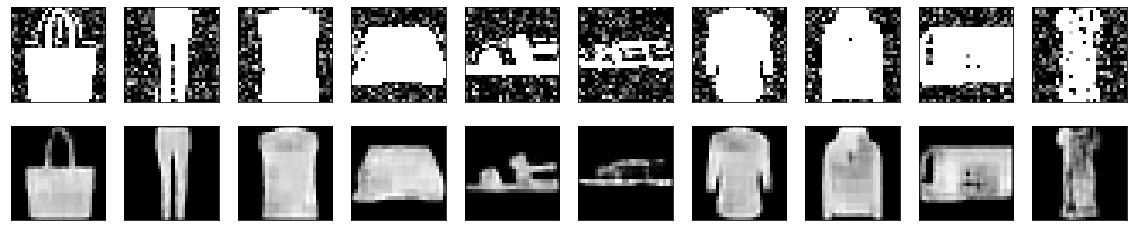

In [15]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)
